In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pyproj

In [7]:
house1_df = gpd.read_file('../data/vectors/House_1очередь_ЖК.shp')
house1_df.head(5)

,Type,Purpose,Elevation,Entrances,Apartments,District,Street,Number,geometry
0,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,2 к3,"POLYGON ((4174099 7468553.82, 4174054.11 74684..."
1,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к2,"POLYGON ((4173865 7468327.02, 4173908.89 74683..."
2,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,1 к1,"POLYGON ((4174008.05 7468232.57, 4173991.51 74..."
3,Жилые дома,Малоэтажный жилой дом,3,4.0,86.0,Коммунарка,Потаповская Роща,3 к1,"POLYGON ((4173744.26 7468440.36, 4173741.92 74..."
4,Жилые дома,Малоэтажный жилой дом,3,3.0,98.0,Коммунарка,Потаповская Роща,2 к4,"POLYGON ((4174166.95 7468519.72, 4174167.88 74..."


In [8]:
exit_subway_df = gpd.read_file('../data/vectors/Выходы_метро.shp')
exit_subway_df.head(5)

,Number,Text,geometry
0,7,Потапово,POINT (4173365.25 7470052.91)
1,6,Потапово,POINT (4173441.38 7470047.67)
2,5,Потапово,POINT (4173487.05 7469711.73)
3,3,Потапово,POINT (4173976.09 7469745.93)
4,4,Потапово,POINT (4174093.74 7469755.22)


In [9]:
house_base_df = gpd.read_file('../data/vectors/Дома_исходные.shp')
house_base_df.head(5)

c:\Users\dkono\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: ../data/vectors/Дома_исходные.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,Name,Type,Caption,Purpose,PostIndex,Elevation,Entrances,Apartments,District,DistrictId,...,StreetId2,Number2,Street3,StreetId3,Number3,Street4,StreetId4,Number4,Material,geometry
0,None,Жилые дома,None,Таунхаус,108803,2.0,NaN,NaN,Коммунарка,4504209520926899,...,None,None,None,None,None,None,None,None,Железобетон,"POLYGON ((4165306.35 7463920.69, 4165286.05 74..."
1,None,Жилые дома,None,Жилой дом,108803,10.0,3.0,108.0,Коммунарка,4504209520926899,...,None,None,None,None,None,None,None,None,Панель,"POLYGON ((4167970.75 7465703.44, 4167992.17 74..."
2,None,Жилые дома,None,Жилой дом,108803,9.0,2.0,67.0,Коммунарка,4504209520926899,...,None,None,None,None,None,None,None,None,Кирпич,"MULTIPOLYGON (((4168473.52 7465603.51, 4168486..."
3,None,Жилые дома,None,Малоэтажный жилой дом,108803,3.0,3.0,18.0,Коммунарка,4504209520926899,...,None,None,None,None,None,None,None,None,Кирпич,"POLYGON ((4168258.38 7464679.75, 4168150.51 74..."
4,None,Жилые дома,None,Малоэтажный жилой дом,108803,3.0,2.0,24.0,Коммунарка,4504209520926899,...,None,None,None,None,None,None,None,None,Кирпич,"POLYGON ((4168562.63 7464563.77, 4168503.49 74..."


In [10]:
stop_df = gpd.read_file('../data/vectors/Остановки_ОТ.shp')
stop_df.head(5)

,TrType,Name,TrStopId,geometry
0,Автобусная остановка,д. Дудкино,4504282527175082,POINT (4169298.8 7486206.48)
1,Автобусная остановка,Академика Семёнова,4504282527177280,POINT (4175492.12 7468089.68)
2,Автобусная остановка,СНТ Гавриково-1,4504282527177281,POINT (4174773.19 7467701.78)
3,Автобусная остановка,СНТ Берёзка-Коммунарка-1,4504282549350453,POINT (4173317.02 7470985.86)
4,Автобусная остановка,СНТ Берёзка-Коммунарка-1,4504282549350455,POINT (4173231.61 7471209.38)


In [11]:
street1_df = gpd.read_file('../data/vectors/Streets_1очередь.shp')
street1_df.head(5)

,ST_NAME,ST_TYP_BEF,ST_NM_BASE,ROAD_CATEG,RoadDirect,RbndStght,RbndBck,Width,MaxSpdDrct,AvgSpdDrct,MaxSpdRvrs,AvgSpdRvrs,Foot,Car,geometry
0,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,60,51,1,1,"LINESTRING (4172103.98 7467757.54, 4172074.73 ..."
1,Проектируемый 7048-й проезд,проезд,Проектируемый 7048-й,Магистральные улицы города,Any,2.0,2.0,12.0,60,60,60,60,1,1,"LINESTRING (4172045.7 7467735.85, 4172027.72 7..."
2,None,None,None,Прочие улицы города,F,1.0,1.0,6.0,40,40,0,0,1,1,"LINESTRING (4172103.98 7467757.54, 4172184.02 ..."
3,None,None,None,Магистральные улицы города,F,2.0,1.0,9.0,60,60,0,0,1,1,"LINESTRING (4171887.34 7467940.43, 4171866.18 ..."
4,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,40,33,1,1,"LINESTRING (4173106.26 7468130.3, 4173008.28 7..."


In [12]:
street_base_df = gpd.read_file('../data/vectors/Streets_исходные.shp')
street_base_df.head(5)

,EdgeId,ST_NAME,ST_TYP_BEF,ST_NM_BASE,ST_NM_CITY,FUNC_CLASS,ROAD_CATEG,F_ZLEV,T_ZLEV,TYPE_LINK,...,AvgSpdDrct,MaxSpdRvrs,AvgSpdRvrs,Foot,Car,duplicat,payment,material,length,geometry
0,13604,None,None,None,None,6,Внутриквартальные проезды,0,0,Обычное звено,...,20,20,20,1,1,None,None,None,39.794,"LINESTRING (4169313.05 7459602.18, 4169363.29 ..."
1,13680,None,None,None,None,6,Внутриквартальные проезды,0,0,Обычное звено,...,20,20,20,1,1,None,None,None,50.849,"LINESTRING (4169368.91 7459679.52, 4169357.17 ..."
2,13686,None,None,None,None,6,Внутриквартальные проезды,0,0,Обычное звено,...,20,20,20,1,1,None,None,None,52.461,"LINESTRING (4167431.36 7459646.24, 4167516.42 ..."
3,13741,None,None,None,None,6,Внутриквартальные проезды,0,0,Обычное звено,...,20,20,20,1,1,None,None,None,110.147,"LINESTRING (4169499.07 7459820.14, 4169493.58 ..."
4,13788,None,None,None,None,6,Внутриквартальные проезды,0,0,Обычное звено,...,20,20,20,1,1,None,None,None,214.529,"LINESTRING (4169053.72 7459877.54, 4169260.2 7..."


<Axes: >

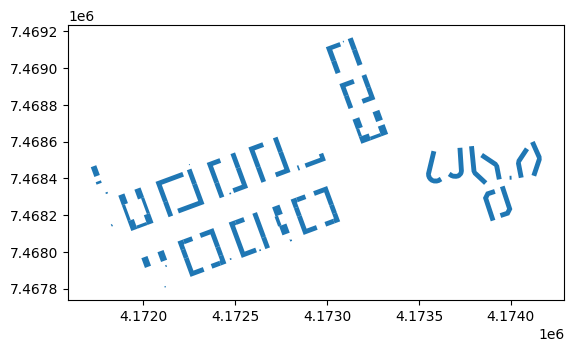

In [13]:
house1_df.plot()

<Axes: >

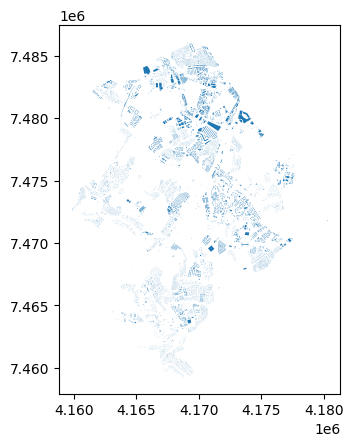

In [14]:
house_base_df.plot()

<Axes: >

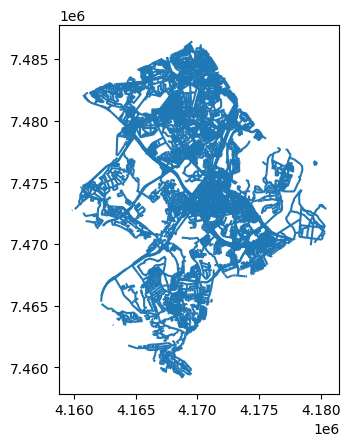

In [15]:
street1_df.plot()

<Axes: >

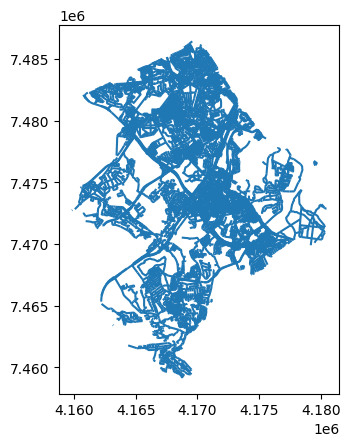

In [16]:
street_base_df.plot()

<Axes: >

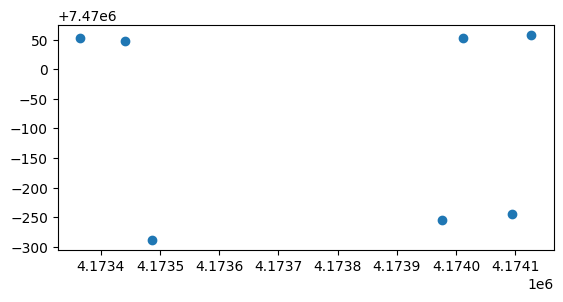

In [17]:
exit_subway_df.plot()

<Axes: >

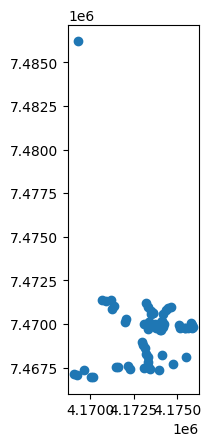

In [18]:
stop_df.plot()